In [1]:
%run C:\Users\HSS\dd.py

### 회귀의 선형 모델
- 회귀 선형 모델은 $\hat{y} = w[0]x[0] + b$의 형식


- 모델은 feature가 하나일 때는 직선, 둘일 때는 평면, 그 이상은 초 평면이 된다.


- KNN 회귀와 비교했을 때, 선형 모델은 데이터의 상세 정보를 잃은 것 처럼 보이며 (사실이다)

    - Y가 X의 선형 조합이라는 것은 사실 비현실적이고 과한 가정이다.
    
    - 그러나 특성의 개수가 많아질 수록 선형 모델은 훌륭한 성능을 나타내며
        - FEATURE > DATA (부정방정식)의 경우 어떤 Y도 선형 함수로 모델링할 수 있다.

In [2]:
import mglearn

w[0]: 0.393906  b: -0.031804


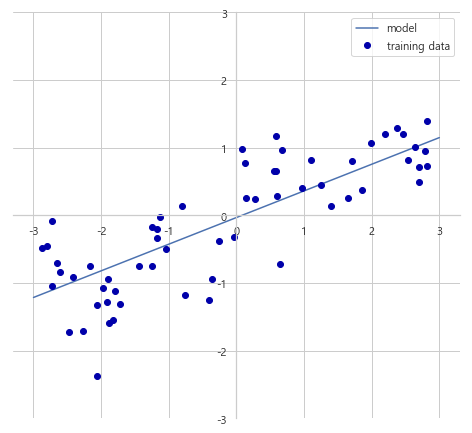

In [6]:
mglearn.plots.plot_linear_regression_wave()



- 회귀를 위한 선형 모델은 다양하지만 파라미터 w와 b를 학습하는 방법과 모델 복잡도를 제어하는 방법에서 차이가 난다.
    - 최소 자승법
    - 릿지, 라쏘

- ### 1. 최소자승법 (OLS)


    - 실제 Y와 모델의 예측 간의 평균 제곱 오차를 최소화하는 파라미터를 찾는다.
    - 매개 변수가 없는 장점을 갖지만, 모델의 복잡도를 제어할 방법이 없다.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

model = LinearRegression().fit(X_train, y_train)



In [21]:
print('model coeff = {:.2f}'.format(model.coef_[0]))
print('model intercept = {:.2f}'.format(model.intercept_))

print('model train score = {:.2f}'.format(model.score(X_train, y_train)))
print('model test score = {:.2f}'.format(model.score(X_test, y_test)))

model coeff = 0.39
model intercept = -0.03
model train score = 0.67
model test score = 0.66


#### 저차원에서의 선형 모델
    - train과 test의 차이가 크지 않다.
    - 그러나 고차원일 수록 과적합의 가능성이 높아진다. (보스턴 예제로 알아보겠음)

In [22]:
# boston data

from sklearn.datasets import load_boston

boston = load_boston()

In [34]:
# 데이터셋 저장
# 특성의 개수가 104개인 고차원 데이터
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
model = LinearRegression().fit(X_train, y_train)

print(X.shape, y.shape)
print('model train score = {:.2f}'.format(model.score(X_train, y_train)))
print('model test score = {:.2f}'.format(model.score(X_test, y_test)))



(506, 104) (506,)
model train score = 0.95
model test score = 0.61


### 모델이 과적합 되었을 때
- 모델의 복잡도를 줄이는 방법으로 시도한다.
- 선형 모델에서 모델의 복잡도를 제어하는 방법

    - #### 1. 라쏘 (Lasso : L1)
    
        - $w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda \sum_{j=1}^M | w_j | \right)$
        - 릿지와 달리 계수의 절대값 합을 최소화한다.
        - 즉, 어떤 계수는 정말로 0 이 되기 때문에 feature selection이 자동으로 진행된다고 할 수 있다.
        
    - #### 2. 릿지 (Ridge : L2)
    
        - $w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda \sum_{j=1}^M w_j^2 \right)$
        - 제곱합의 최소화를 통해 여러 계수가 점진적으로 0을 향해 줄어든다.
        
    - #### 3. 엘라스틱넷 (ElasticNet)
    
        - $w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda_1 \sum_{j=1}^M | w_j | + \lambda_2 \sum_{j=1}^M w_j^2 \right)$ 
        - L1과 L2의 조합으로 최상의 성능을 낸지만 alpha 뿐 아니라 L1 RATIO를 조정해야 한다.


- 결국 alpha와 L1의 비율을 통해 정규화를 진행함
- L1은 초기에 W의 계수를 0으로 만드는 경향이 있고 L2는 모든 계수를 서서히 0으로 줄여감

In [39]:
from sklearn.linear_model import Ridge

# 테스트 성능이 향상됨
# alpha를 지정하지 않으면 1.0 default

ridge = Ridge().fit(X_train, y_train)
print('model train score = {:.2f}'.format(ridge.score(X_train, y_train)))
print('model test score = {:.2f}'.format(ridge.score(X_test, y_test)))
print('\n')
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print('model10 train score = {:.2f}'.format(ridge10.score(X_train, y_train)))
print('model10 test score = {:.2f}'.format(ridge10.score(X_test, y_test)))

model train score = 0.89
model test score = 0.75


model10 train score = 0.79
model10 test score = 0.64


#### alpha와 모델 성능
- alpha를 높이면 계수의 제약은 커지며, 모델은 단순해진다.
- alpha를 낮추면 계수의 제약은 작아지며, 모델은 복잡해진다.
- 최적의 `alpha`를 찾는 것은 파라미터 튜닝을 통해 찾을 수 있다.

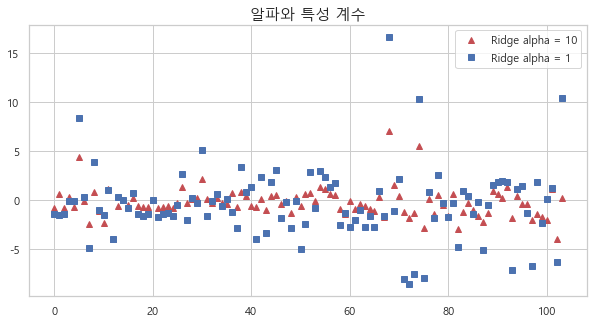

In [52]:
### alpha가 커질수록 계수는 작아진다.

plt.figure(figsize = (10,5))
plt.title('알파와 특성 계수', fontsize = 15)
plt.plot(ridge10.coef_, 'r^', label = 'Ridge alpha = 10')
plt.plot(ridge.coef_, 's', label = 'Ridge alpha = 1')
plt.legend()
plt.show()

### 데이터 크기와 정규화 모델 성능의 관계

- 훈련 성능 > 테스트 성능
- 훈련 데이터에서 릿지는 학습을 규제하기 때문에 훈련 성능이 떨어진다.
- 테스트 성능은 릿지가 좋지만 데이터가 커질 수록 선형 모델의 성능이 따라잡는다.
    - #### *왜일까?* 
        - 굳이 정규화를 하지 않아도 커다란 데이터를 과적합 학습하기 어려워 지기 때문

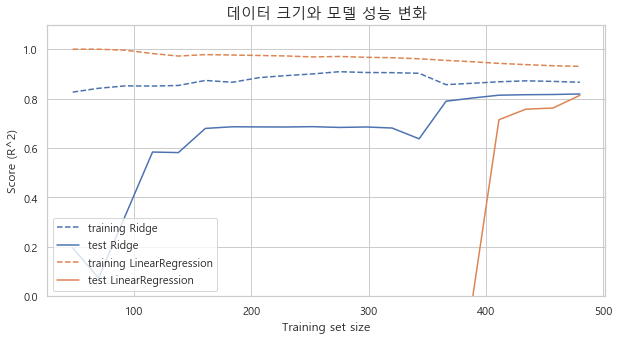

In [55]:
plt.figure(figsize = (10,5))
plt.title("데이터 크기와 모델 성능 변화", fontsize = 15)
mglearn.plots.plot_ridge_n_samples()
plt.legend(loc = 3)
plt.show()

#### 분류용 선형 모델

- $\hat{y} = w[0]x[0] + b > 0$


- 1. Logistic Regression
- 2. Support Vector Machine

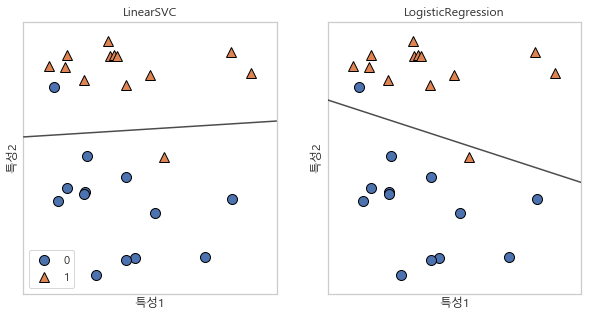

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10,5))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps=0.5, ax = ax, alpha = .7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('특성1')
    ax.set_ylabel('특성2')
axes[0].legend()
plt.show()

- 기본적으로 SVM, LR 모두 L2 규제를 사용한다. 
- 규제 상수로 C라는 매개변수를 사용한다. 이전의 alpha와 다르게 C가 커지면 규제 강도가 낮아진다.




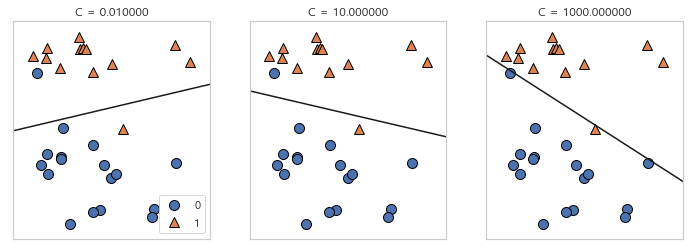

In [9]:
mglearn.plots.plot_linear_svc_regularization()

- 선형 분류 모델 역시 고차원에서 강력한 성능을 발휘하며 overfitting 문제를 해결하는 것이 더욱 중요해진다.

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression().fit(X_train, y_train)

print("훈련 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 점수: {:.3f}".format(logreg.score(X_test, y_test)))



훈련 점수: 0.946
테스트 점수: 0.958


In [23]:
### 훈련 성능과 테스트 성능의 차이가 매우 적다 -> 과소 적합 -> 학습이 덜 되었다 -> C를 늘려 규제를 약하게 함

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("훈련 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))



훈련 점수: 0.955
테스트 점수: 0.965


In [22]:
### 규제가 매우 강한 경우 -> 모델이 단순해지며 train test 성능이 모두 낮아짐

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("훈련 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))



훈련 점수: 0.934
테스트 점수: 0.930


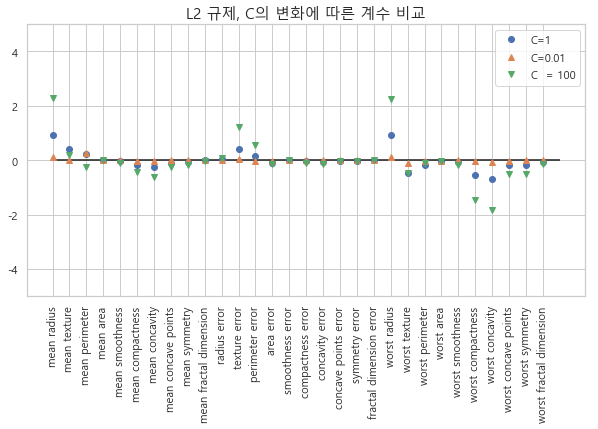

In [60]:
plt.figure(figsize = (10,5))
plt.title('L2 규제, C의 변화에 따른 계수 비교', fontsize = 15)
plt.plot(logreg.coef_.T, 'o', label = 'C=1')
plt.plot(logreg001.coef_.T, '^', label = 'C=0.01')
plt.plot(logreg100.coef_.T, 'v', label = 'C  = 100')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.legend()
plt.show()

- 3번 `mean perimeter` 특성은 C에 따라 부호가 바뀐다. 
- ##### 선형 모델의 계수는 항상 의심하고 조심해서 해석해야 한다.

### L1과 L2 규제의 비교
- L2와 다르게 L1에서는 대부분의 계수가 0으로 적용되었다.
    - L1 규제는 특성의 개수를 제한하지만, 모델을 더욱 해석하기 쉽게 만들어준다.

C = 0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C = 0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.92


C = 1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C = 1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.96


C = 100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C = 100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.98




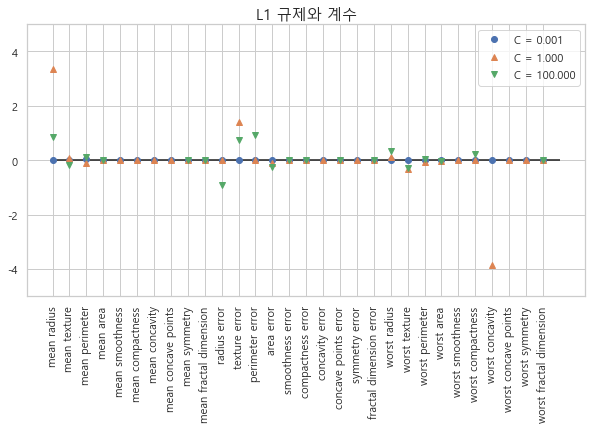

In [61]:
plt.figure(figsize = (10,5))
plt.title('L1 규제와 계수', fontsize = 15)

for C , marker in zip([0.001, 1, 100], ['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty = 'l1',solver = 'liblinear' ).fit(X_train, y_train)
    
    print('C = {:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('C = {:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}'.format(C, lr_l1.score(X_test, y_test)))
    print('\n')
    
    plt.plot(lr_l1.coef_.T, marker, label = "C = {:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.legend()
plt.show()

In [50]:
LogisticRegression(penalty = 'l1',solver = 'liblinear' ).fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)